# Análise de Depressão Estudantil com SVM 

Este notebook implementa um modelo de Support Vector Machine para classificação binária de depressão em estudantes. O SVM é uma técnica de aprendizado de máquina que encontra o hiperplano ótimo para separar classes diferentes, sendo especialmente eficaz para problemas de classificação com datasets de média dimensionalidade.

## Objetivos
- Construir um modelo de SVM
- Regularizar dos parâmetros 𝐶 e 𝛾 (gama) através
de cross validation
- Analisar a existência de overfitting;
- Avaliar o desempenho do modelo

Carregamos as bibliotecas necessárias para preprocessamento de dados, modelagem SVM, validação cruzada e visualização de resultados.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import seaborn as sns
import joblib

### 1. Carregar o conjunto de dados

Carregamos o dataset limpo de depressão em estudantes que foi preprocessado na etapa de EDA. Este dataset contém features engineered específicas para melhorar a capacidade preditiva do modelo.

In [10]:
df = pd.read_csv("../data/Student_Depression_Cleaned.csv", sep=',')

### 2. Definição das features e o target

In [11]:
features = [
    'Academic Pressure', 'Have you ever had suicidal thoughts ?','Weighted Stress',
    'Financial Stress','Extreme_Mental_Crisis','Mental_Vulnerability_Score','Mental_Health_Crisis_Index','Stress_Vulnerability_Multiplier',
    'Ultimate_Depression_Predictor','Family History of Mental Illness','Work/Study Hours',
]

X = df[features]
y = df['Depression']

In [12]:
print("Distribuição das classes:")
print(y.value_counts())

Distribuição das classes:
Depression
0    7935
1    7935
Name: count, dtype: int64


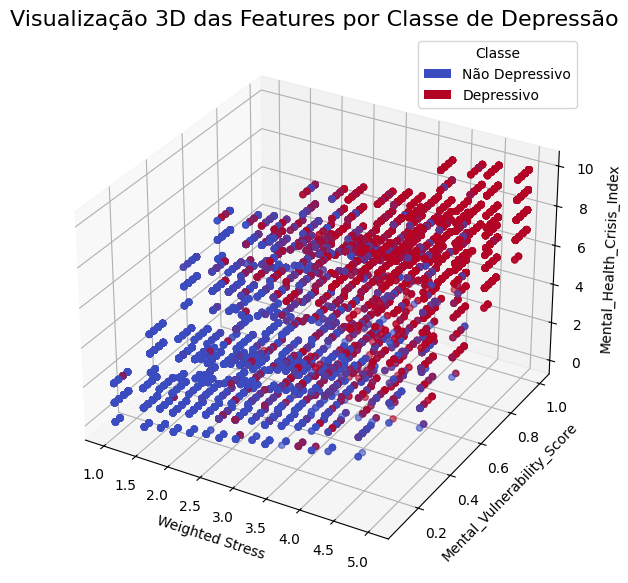

In [13]:
feature1 = 'Weighted Stress'
feature2 = 'Mental_Vulnerability_Score'
feature3 = 'Mental_Health_Crisis_Index'

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[feature1], X[feature2], X[feature3], c=y, cmap='coolwarm', alpha=0.6)

# Adicionando títulos e rótulos
ax.set_title('Visualização 3D das Features por Classe de Depressão', fontsize=16)
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)

classes = ['Não Depressivo', 'Depressivo']
class_colours = [scatter.cmap(scatter.norm(0)), scatter.cmap(scatter.norm(1))]
recs = [mpatches.Rectangle((0,0),1,1,fc=class_colours[i]) for i in range(len(classes))]
ax.legend(recs, classes, title="Classe")

plt.show()

Os pontos azuis, que representam a classe "Não Depressivo", estão predominantemente concentrados em regiões com valores mais baixos de estresse, vulnerabilidade e índice de crise. Em contrapartida, os pontos vermelhos ("Depressivo") se concentram em áreas com valores mais altos nessas três métricas. Existe uma zona de transição no meio do gráfico onde pontos azuis e vermelhos se misturam. Isso indica que, embora essas três features sejam bons indicadores, elas não são suficientes para separar perfeitamente as duas classes. 

### 3. Divisão dos dados em conjuntos de treino e teste

- **80% para treino**: Dados suficientes para o modelo aprender os padrões
- **20% para teste**: Amostra representativa para avaliação final

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

#### 3.1. Padronização dos dados

A padronização é crucial para SVM pois o algoritmo é sensível à escala das features. O StandardScaler normaliza as features para média 0 e desvio padrão 1, garantindo que todas tenham igual importância no cálculo das distâncias.

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4. Definição da grade de parâmetros para o GridSearchCV e Treinamento do Modelo

Utilizamos Grid Search com validação cruzada (CV=10) para encontrar os melhores hiperparâmetros:
- **C**: Parâmetro de regularização (controla trade-off entre margem e classificação correta)
- **gamma**: Parâmetro do kernel RBF (controla a influência de cada exemplo de treino)
- **kernel**: Usamos RBF (Radial Basis Function) por sua eficácia em problemas não-lineares

O modelo é salvo junto com o scaler para uso posterior, garantindo consistência no preprocessamento.

In [ ]:
#param_grid = {
#   'C': [0.1, 1, 10, 50, 100],
#    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#    'kernel': ['rbf']
#}

In [ ]:
#grid = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=param_grid, cv=5)
#grid.fit(X_train_scaled, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


In [ ]:
#best_model = grid.best_estimator_
#print(f"Melhores parâmetros encontrados: {grid.best_params_}")

Melhores parâmetros encontrados: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
#joblib.dump(best_model, '../modelos/models/svm_best_model3.pkl')
#joblib.dump(scaler, '../modelos/models/svm_scaler3.pkl')

['../modelos/models/svm_scaler3.pkl']

#### 4.1 Aplicando SVM com o modelo salvo

Carregamos o modelo SVM otimizado e o scaler salvos anteriormente. Isso permite reutilização do modelo sem necessidade de retreinar, mantendo a consistência do preprocessamento.

In [16]:
best_model = joblib.load('../modelos/models/svm_best_model3.pkl')
scaler = joblib.load('../modelos/models/svm_scaler3.pkl')

c:\Users\carlo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.7.2 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\carlo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.2 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

### 5. Cálculo Ein e Eout

Utilizamos uma divisão 80-20 com `random_state=1` para garantir reprodutibilidade. Esta proporção é adequada para o tamanho do dataset, permitindo:
- **80% para treino**: Dados suficientes para o modelo aprender os padrões
- **20% para teste**: Amostra representativa para avaliação final

In [19]:
ein = 1 - accuracy_score(y_train, y_train_pred)
eout = 1 - accuracy_score(y_test, y_test_pred)
print(f"Erro dentro da amostra (Ein): {ein:.4f}")
print(f"Erro fora da amostra (Eout): {eout:.4f}")

Erro dentro da amostra (Ein): 0.1689
Erro fora da amostra (Eout): 0.1749


### 6. Cálculo do valor esperado de Eout (limite superior)

O **limite superior teórico de Eout** é baseado na teoria estatística do SVM, onde o número de vetores de suporte dividido pelo tamanho da amostra fornece uma estimativa conservadora do erro de generalização.

Menos vetores de suporte geralmente indicam melhor generalização e menor complexidade do modelo.

In [20]:
n_support_vectors = best_model.support_vectors_.shape[0]
n_training_samples = X_train.shape[0]
expected_eout_bound = n_support_vectors / n_training_samples

print(f"Número de vetores de suporte: {n_support_vectors}")
print(f"Tamanho do conjunto de treino: {n_training_samples}")
print(f"Valor esperado de Eout (limite superior): {expected_eout_bound:.4f}")

Número de vetores de suporte: 6625
Tamanho do conjunto de treino: 12696
Valor esperado de Eout (limite superior): 0.5218


### 7. Gráfico de Erros

A visualização comparativa entre Ein e Eout permite avaliar rapidamente:
- **Overfitting**: Se Eout > Ein
- **Boa generalização**: Se Ein ≈ Eout e ambos são baixos
- **Underfitting**: Se ambos são altos

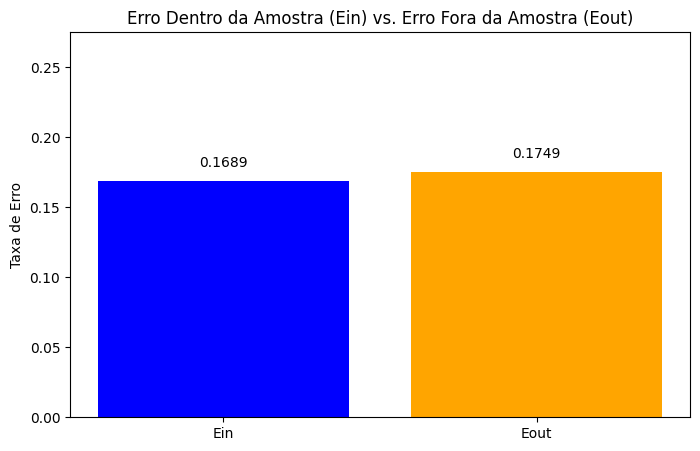

In [21]:
plt.figure(figsize=(8, 5))
plt.bar(['Ein', 'Eout'], [ein, eout], color=['blue', 'orange'])
plt.title('Erro Dentro da Amostra (Ein) vs. Erro Fora da Amostra (Eout)')
plt.ylabel('Taxa de Erro')
plt.ylim(0, max(ein, eout) + 0.1)
for i, v in enumerate([ein, eout]):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()

### 8. Métricas de classificação

O **Classification Report** fornece métricas detalhadas por classe:
- **Precision**: Proporção de predições positivas corretas
- **Recall (Sensitivity)**: Proporção de casos positivos reais identificados
- **F1-Score**: Média harmônica entre precision e recall
- **Support**: Número de amostras em cada classe

Em problemas de saúde mental, o recall para a classe "Depressivo" é particularmente importante para minimizar falsos negativos.

In [22]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1596
           1       0.81      0.84      0.83      1578

    accuracy                           0.83      3174
   macro avg       0.83      0.83      0.83      3174
weighted avg       0.83      0.83      0.83      3174



O modelo SVM apresentou um desempenho geral sólido, com uma acurácia de 83%. As métricas para as classes "Não Depressivo" (classe 0) e "Depressivo" (classe 1) estão bem equilibradas, com precision, recall e F1-score em torno de 0.82 a 0.83 para ambas as classes. Isso indica que o modelo é capaz de identificar ambas as classes de forma consistente, sem favorecer uma classe em detrimento da outra.

### 9. Matriz de Confusão

A **Matriz de Confusão** visualiza o desempenho detalhado da classificação:
- **Verdadeiros Positivos (TP)**: Casos depressivos corretamente identificados
- **Falsos Positivos (FP)**: Não depressivos classificados como depressivos  
- **Falsos Negativos (FN)**: Casos depressivos não identificados (crítico em saúde mental)
- **Verdadeiros Negativos (TN)**: Não depressivos corretamente classificados

A matriz permite calcular métricas específicas e identificar padrões de erro do modelo.

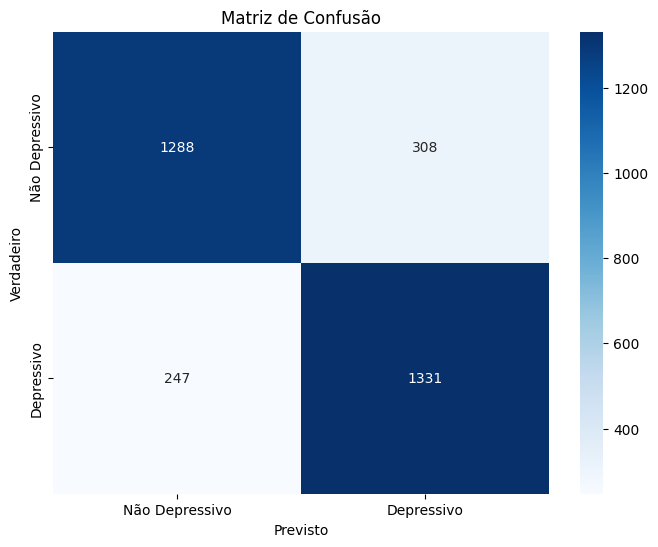

In [23]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Depressivo', 'Depressivo'], yticklabels=['Não Depressivo', 'Depressivo'])
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

In [24]:
import pickle
from datetime import datetime
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Calcular métricas adicionais
precision_0 = precision_score(y_test, y_test_pred, pos_label=0)
precision_1 = precision_score(y_test, y_test_pred, pos_label=1)
recall_0 = recall_score(y_test, y_test_pred, pos_label=0)
recall_1 = recall_score(y_test, y_test_pred, pos_label=1)
f1_0 = f1_score(y_test, y_test_pred, pos_label=0)
f1_1 = f1_score(y_test, y_test_pred, pos_label=1)
accuracy = accuracy_score(y_test, y_test_pred)

# Calcular probabilidades para AUC (se o modelo suportar)
try:
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
except:
    # Para modelos SVM que não têm predict_proba por padrão
    y_score = best_model.decision_function(X_test_scaled)
    auc = roc_auc_score(y_test, y_score)

# Criar dicionário com as métricas
metricas_svm = {
    "modelo": "SVM",
    "accuracy": accuracy,
    "precision_0": precision_0,
    "precision_1": precision_1,
    "recall_0": recall_0,
    "recall_1": recall_1,
    "f1_score_0": f1_0,
    "f1_score_1": f1_1,
    "auc": auc,
    "ein": ein,
    "eout": eout,
    "overfitting": eout - ein,
    "n_support_vectors": n_support_vectors,
    "data": datetime.now()
}

# Salvar métricas em arquivo pickle
with open("../modelos/models/metricas_svm.pkl", "wb") as f:
    pickle.dump(metricas_svm, f)

print("Métricas do SVM salvas em ../metricas/metricas_svm.pkl")

# Exibir resumo das métricas salvas
print("\nResumo das métricas salvas:")
for key, value in metricas_svm.items():
    if key != "data":
        print(f"{key}: {value:.4f}" if isinstance(value, float) else f"{key}: {value}")
    else:
        print(f"{key}: {value}")

Métricas do SVM salvas em ../metricas/metricas_svm.pkl

Resumo das métricas salvas:
modelo: SVM
accuracy: 0.8251
precision_0: 0.8391
precision_1: 0.8121
recall_0: 0.8070
recall_1: 0.8435
f1_score_0: 0.8227
f1_score_1: 0.8275
auc: 0.8850
ein: 0.1689
eout: 0.1749
overfitting: 0.0060
n_support_vectors: 6625
data: 2025-09-30 12:01:20.599947
